## Semana 8 - AceleraDev DataScience Codenation

**Descubra as melhores notas de matemática do ENEM 2016**


Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. Para isso, usará Python, Pandas, Sklearn e Regression.

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. 

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado **answer.csv** com duas colunas: **NU_INSCRICAO e NU_NOTA_MT**.

### Setup do desafio

Iniciamos o desafio com os imports das libs necessárias

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

O próximo passo na nossa análise é importar as bases de dados para realizar esse desafio.

* Os dados do **df_train** serão utilizados para treinar o modelo de regressão desenvolvido aqui.

* O **df_test** é onde iremos aplicar o modelo que foi desenvolvido e treinado.

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

**Verificação das colunas**

Antes de iniciar as análises  verificaremos quais colunas possuem os dois Data Sets utilizados.

In [4]:
df_train.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [5]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

O dataset de treino possui um numero inferior de colunas em relação ao nosso dataframe de testes. O importante nesse caso é verificarmos quais variáveis temos em nosso dataset de treino que são úteis e relevantes para treinar nosso modelo.

**Estatística Descritiva**

Aqui temos a estatística descritiva dos nossos dados:

* Quantidade de dados
* Média, desvio padrão, mínimo, máximo e quantils de cada uma das colunas.

Como o DataSet é composto por variáveis quantitativas essas informações podem ser muito úteis

In [6]:
df_train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**Verificando a correlação**

Conhecendo a estatística descritiva podemos verificar a correlação entre nossas variáveis e verificar quais possuem melhor correlação com a coluna NU_NOTA_MF.

In [7]:
df_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q037,-0.004914,NaN,-0.013479,-0.013647,-0.003569,0.002294,0.086642,0.032588,-0.024174,-0.024201,...,0.220839,0.225791,0.245757,0.202230,0.387722,1.000000,0.496678,0.254418,0.270380,0.187921
Q038,0.003906,NaN,-0.032710,-0.032467,-0.035306,-0.014725,0.069298,0.024112,-0.038666,-0.038305,...,0.159887,0.223508,0.215767,0.142610,0.378421,0.496678,1.000000,0.374424,0.259947,0.219529
Q039,0.001002,NaN,-0.094862,-0.094113,-0.069973,-0.066346,0.046830,0.011327,-0.097273,-0.096666,...,0.144264,0.206979,0.189252,0.225724,0.270343,0.254418,0.374424,1.000000,0.305357,0.262031
Q040,-0.010967,NaN,-0.077456,-0.076838,-0.010988,-0.022736,0.053556,0.014847,-0.081490,-0.080963,...,0.215292,0.176028,0.243190,0.179292,0.177025,0.270380,0.259947,0.305357,1.000000,0.306438


**Verificando as distribuições**

In [8]:
plt.style.use('ggplot')
%matplotlib inline

In [9]:
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

In [10]:
features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

**Verificação de nulos**

Agora que temos nossas features de treino iremos verificar os valores.

In [11]:
df_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

**Matriz de correlação**

In [12]:
correlation = df_train[features_corr].corr()

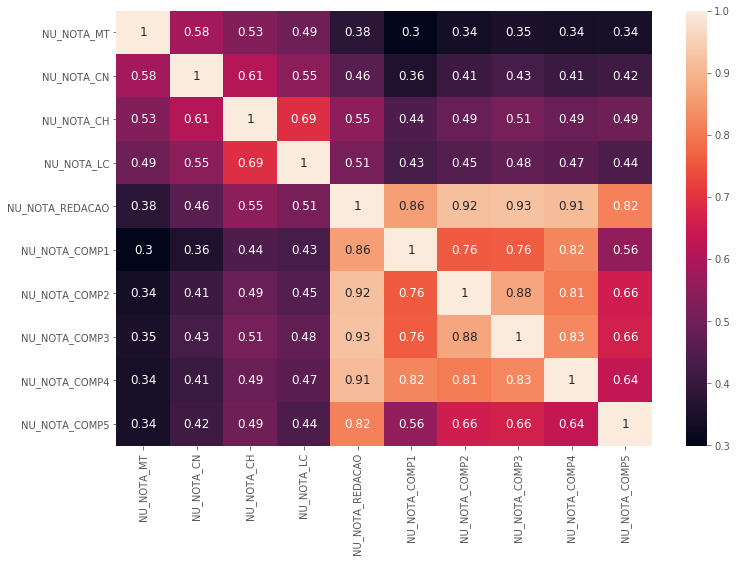

In [13]:
xaxis = plt.subplots(figsize = (12,8))
sns.heatmap(correlation, annot=True, annot_kws = {"size":12})

**Gráficos das distribuições dos dados**

**Distribuição de notas de Ciências da Natureza**

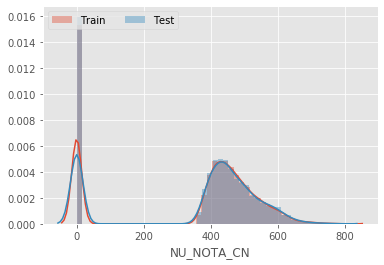

In [14]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels =['Train','Test'], ncol = 2, loc ='upper left');

**Distribuição de notas de Ciências Humanas**

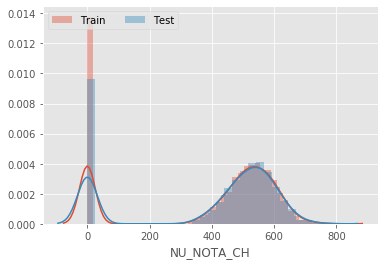

In [15]:
x2 = df_train['NU_NOTA_CH'].fillna(0)
x3 = df_test['NU_NOTA_CH'].fillna(0)

sns.distplot(x2)
sns.distplot(x3)
plt.legend(labels =['Train','Test'], ncol = 2, loc ='upper left');

**Distribuição de notas de Linguagens e Códigos**

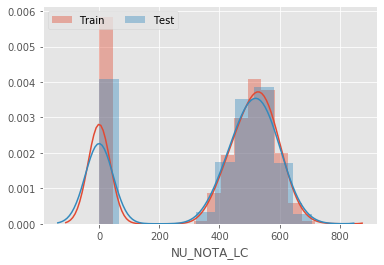

In [16]:
x4 = df_train['NU_NOTA_LC'].fillna(0)
x5 = df_test['NU_NOTA_LC'].fillna(0)

sns.distplot(x4)
sns.distplot(x5)
plt.legend(labels =['Train','Test'], ncol = 2, loc ='upper left');

Nos gráficos acima grande parte das notas foram zeradas, pois valores (null == 0)
Procedimento para tratar esses zeros: remoção do dataset de treino desses valores para que o modelo treinado siga uma distribuição "normal".

In [17]:
df_train = df_train.loc[(df_train['NU_NOTA_CN'].notnull()) & (df_train['NU_NOTA_CN']!=0) & 
                  (df_train['NU_NOTA_CH'].notnull()) & (df_train['NU_NOTA_CH']!=0) & 
                  (df_train['NU_NOTA_LC'].notnull())&(df_train['NU_NOTA_LC']!=0) &
                       (df_train['NU_NOTA_REDACAO'].notnull() & (df_train['NU_NOTA_REDACAO'] != 0))]

Após removermos os valores zerados iremos plotar as curvas para vermos as distribuições das notas.

In [18]:
df_train[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

Repare que agora não possuímos mais valores nulos em nosso dataset de treino.  

**Distribuição das notas dos dados de treino após a remoção dos valores nulos**

**Distribuição das notas de Ciências da Natureza**

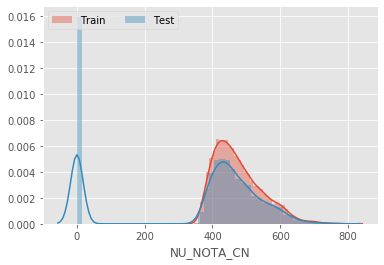

In [19]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels =['Train','Test'], ncol = 2, loc ='upper left');

**Distribuição das notas de Ciências Humanas**

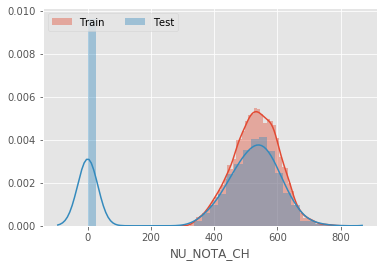

In [20]:
x2 = df_train['NU_NOTA_CH'].fillna(0)
x3 = df_test['NU_NOTA_CH'].fillna(0)

sns.distplot(x2)
sns.distplot(x3)
plt.legend(labels =['Train','Test'], ncol = 2, loc ='upper left');

**Distribuição das notas de Linguagens e Códigos**

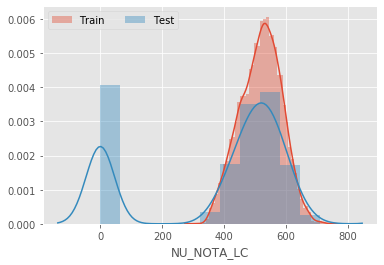

In [21]:
x4 = df_train['NU_NOTA_LC'].fillna(0)
x5 = df_test['NU_NOTA_LC'].fillna(0)

sns.distplot(x4)
sns.distplot(x5)
plt.legend(labels =['Train','Test'], ncol = 2, loc ='upper left');

**Prova do Enem: 2 dias**


*   Dia 1:Linguagens e Códigos, Redação e Matemática
*   Dia 2: Ciências Humanas e Ciências da Natureza

Logo Linguagens e Códigos, Redação e Matemática. Se pegarmos a variável **TP_PRESENCA_LC** e se o aluno não esteve presente na prova de Linguagens e Códigos ele tirou 0 na Prova de Matemática. 


### Verificando as distribuições da Base de dados de Teste


Agora selecionamos valores diferentes de 0 e não nulos na base de teste.

In [22]:
df_test= df_test.loc[(df_test['NU_NOTA_CN'].notnull()) & (df_test['NU_NOTA_CN']!=0) & 
                  (df_test['NU_NOTA_CH'].notnull()) & (df_test['NU_NOTA_CH']!=0) & 
                  (df_test['NU_NOTA_LC'].notnull())&(df_test['NU_NOTA_LC']!=0) & 
                  (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO']!=0)]

In [23]:
df_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

Verificamos assim que não há mais valores nulos no Dataset de teste.

**Construindo os gráficos de Distribuição**

Após tratarmos os valores nulos do dataset de teste verificamos que os gráficos de distribuição das notas se encontram de teste e treino apresentam maior similaridade, tornando nossos dados mais homogêneos.

**Distribuição das notas de Ciências da Natureza**

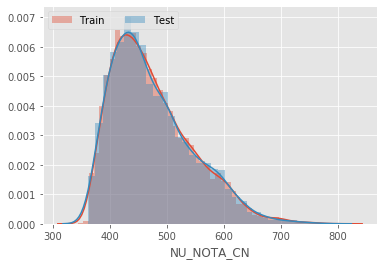

In [24]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels =['Train','Test'], ncol = 2, loc ='upper left');

**Distribuição das Notas de Ciências Humanas**

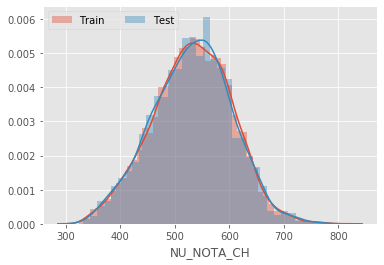

In [25]:
x2 = df_train['NU_NOTA_CH'].fillna(0)
x3 = df_test['NU_NOTA_CH'].fillna(0)

sns.distplot(x2)
sns.distplot(x3)
plt.legend(labels =['Train','Test'], ncol = 2, loc ='upper left');

**Distribuição das notas de Linguagens e códigos**

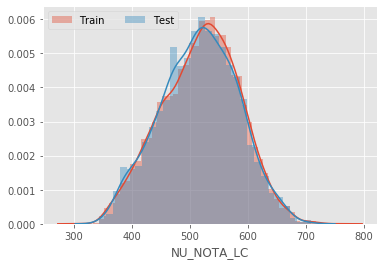

In [26]:
x4 = df_train['NU_NOTA_LC'].fillna(0)
x5 = df_test['NU_NOTA_LC'].fillna(0)

sns.distplot(x4)
sns.distplot(x5)
plt.legend(labels =['Train','Test'], ncol = 2, loc ='upper left');

### Criando o Modelo de Regressão

Como dito anteriormente a prova do Enem ocorre em 2 dias. O dia da prova de matemática (que é de nosso interesse) ocorre no mesmo dia da nota de Linguagens e Códigos ('NU_NOTA_LC') e da redação('NU_NOTA_REDACAO'). 

Quanto a nota da redação ela é dividida em competências, logo podemos considerar o valor 0 (zero) quando não se atinge uma competência.

Então, o primeiro passo será setar em 0 todos os campos que se encontram nulos nas competências atribuídas a nota da Redação. 

**Observação**: As notas serão zeradas no dataset de treino e de teste.

In [27]:
df_test['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP5'].fillna(0,inplace=True)

df_train['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP5'].fillna(0,inplace=True)

Vamos atribuir a uma variável do DataSet de Treino os valores das notas de matemática daquele ano, chamaremos essa variável de  **y_train**.

In [28]:
y_train = df_train['NU_NOTA_MT']

Após atribuir a nota de matemática iremos setar valores de x para o dataset de treino e teste com as features que selecionamos anteriormente.

In [29]:
x_train = df_train[features]
x_test = df_test[features]

O último passo antes da aplicação do modelo de regressão é a normalização dos nossos dados. Para isso precisaremos importar o Preprocessing do Sklearn.

Um ponto importante é que eu **nunca** devo fazer um fit nos dados de teste, o fit é feito nos dados de treino

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

**Modelo de Regressão Linear**

Iremos prever as notas de matemática utilizando o modelo de Regressão Linear.

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

Vamos fazer um fit nos nossos dados de Treino e treinar nosso modelo para aplicar posteriormente nos nossos dados de teste.

In [33]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
predict_train = regressor.predict(x_train)
predict_train

array([459.65573323, 500.99299585, 465.32811254, ..., 485.70763887,
       481.98269853, 510.48706734])

Temos um array com as notas que foram previstas por nosso dataset de treino. Vamos transformar esse array em uma série.

In [35]:
predict_train = pd.Series(predict_train)
predict_train

0       459.655733
1       500.992996
2       465.328113
3       466.823098
4       605.523724
           ...    
9847    409.064415
9848    464.941013
9849    485.707639
9850    481.982699
9851    510.487067
Length: 9852, dtype: float64

**Validando nosso Modelo**

**Median Absolute Error**

Outra medida interessante é o MedAE, a mediana dos erros de predição. Essa métrica é robusta à presença de outliers, pois considera os quantis dos resultados ao invés da média, que é muito mais sensível à variações extremas.

O MedAE é computado como:

$$\text{MedAE} = \text{mediana}\{y_{1} - \hat{y}_{1}, y_{2} - \hat{y}_{2}, \cdots, y_{n} - \hat{y}_{n}\}$$


Esse valor assume qualquer valor real e, como toda medida de erro, quanto menor, melhor o modelo. Assim como o MSE, esse valor por si só não diz muita coisa, e é melhor utilizado ao comparar modelos.

In [36]:
from sklearn import metrics

metrics.mean_absolute_error(y_train, predict_train)

60.942706507600725

In [38]:
from sklearn.metrics import r2_score
r2_score(y_train, predict_train) 

0.4039935755929761

**Aplicando o modelo nos dados de Teste**


Agora iremos aplicar o nosso modelo nos nossos dados de teste e prever a nota de matemática.

In [39]:
predict_note = regressor.predict(x_test)

In [40]:
predict_note = pd.Series(predict_note)
predict_note

0       437.896526
1       433.455371
2       583.310742
3       539.060764
4       464.041472
           ...    
3281    510.973187
3282    443.396266
3283    462.497403
3284    620.928391
3285    447.971536
Length: 3286, dtype: float64

In [41]:
print(predict_note)

0       437.896526
1       433.455371
2       583.310742
3       539.060764
4       464.041472
           ...    
3281    510.973187
3282    443.396266
3283    462.497403
3284    620.928391
3285    447.971536
Length: 3286, dtype: float64


Os números de inscricao se encontram em nosso dataset de test e iremos o colocar em uma variável para criar um dataframe que contenha o número da inscrição e as notas previstas pelo nosso modelo.

In [42]:
num_inscricao = df_test['NU_INSCRICAO']

In [43]:
answer = pd.concat([num_inscricao, predict_note], axis=1)
answer

,NU_INSCRICAO,0
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,437.896526
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,433.455371
2,b38a03232f43b11c9d0788abaf060f7366053b6d,583.310742
3,NaN,539.060764
4,715494628a50142ce8cb17191cfe6d0f3cae0934,464.041472
...,...,...
4570,13aaf6335f43cfc1b8baeac559324f20b2653724,NaN
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,NaN
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,NaN
4573,655fa6306720ff16e825903b5422a46608a77545,NaN


Nosso DataSet contém o número de inscrição e as notas previstas, entretanto precisamos renomear a coluna das notas conforme foi pedido.

In [44]:
answer.rename(columns={0:'NU_NOTA_MT'}, inplace=True)
answer

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,437.896526
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,433.455371
2,b38a03232f43b11c9d0788abaf060f7366053b6d,583.310742
3,NaN,539.060764
4,715494628a50142ce8cb17191cfe6d0f3cae0934,464.041472
...,...,...
4570,13aaf6335f43cfc1b8baeac559324f20b2653724,NaN
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,NaN
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,NaN
4573,655fa6306720ff16e825903b5422a46608a77545,NaN


Agora vamos criar um arquivo para submissão do desafio. O desafio pede um arquivo com o nome answer.csv e que contenha apenas 2 colunas, como podemos observar o dataframe que construímos possui índice, vamos colocar o index como false para removê-lo.


In [45]:
answer.to_csv('answer.csv',columns=['NU_INSCRICAO', 'NU_NOTA_MT'], sep=',', index=False)